# Proyecto Final

## Preprocesamiento de datos

Descomprimimos cada uno de nuestros archivos *.zip* y los almacenamos en una carpeta llamada *dataset*.

In [1]:
from zipfile import ZipFile

# Le hacemos un unzip a nuestro conjunto de entrenamiento.
with ZipFile('dataset/train.csv.zip', 'r') as zipObj:
    zipObj.extractall('dataset')

# Le hacemos un unzip a nuestro conjunto de prueba.
with ZipFile('dataset/test.csv.zip', 'r') as zipObj:
    zipObj.extractall('dataset')

Leemos los datos que contiene el archivo *train.csv*.

In [2]:
import pandas as pd

df = pd.read_csv('dataset/train.csv')
df.shape

# Visualizamos el dataframe con los primeros 10 datos. 
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [3]:
# Renombramos los datos de la variable 'label'. 
df["label"] = df["label"].replace({0:'REAL', 1:'FAKE'})

In [5]:
# Obtenemos las etiquetas de cada uno de los artículos.
labels = df.label

# Visualizamos las primeras 10 etiquetas.
labels.head(10)

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
5    REAL
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

# Dividimos nuestro conjunto de datos con un split del 75-25 para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.25, random_state = 7)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializamos un TfidfVectorizer. 
v = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [20]:
import numpy as np

# Entrenamos y transformamos el conjunto de entrenamiento.
v_train = v.fit_transform(X_train.apply(lambda x: np.str_(x))) 

# Transformamos el conjunto de prueba.
v_test =v.transform(X_test.apply(lambda x: np.str_(x)))

In [21]:
X_train.shape, X_test.shape, v_train.shape, v_test.shape

((15600,), (5200,), (15600, 153026), (5200, 153026))

## Perceptrón Multicapa

In [22]:
from sklearn.neural_network import MLPClassifier

# Arquitectura.
mlpc = MLPClassifier(max_iter = 1000, 
                     learning_rate_init = 0.0001, 
                     hidden_layer_sizes = (2, 4))

In [23]:
# Entrenamos nuestra red.
mlpc_entrenamiento = mlpc.fit(v_train, y_train)

In [24]:
# Predecimos en el conjunto de prueba.
mlpc_prediction = mlpc.predict(v_test) 

In [25]:
from sklearn.metrics import accuracy_score

# Obtenemos la precisión.
score_mlp = accuracy_score(y_test, mlpc_prediction)
print(f'Precisión: {round(score_mlp * 100, 2)}%')

Precisión: 95.77%


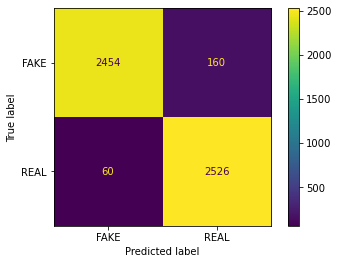

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Visualizamos su respectiva matriz de confusión.
plot_confusion_matrix(mlpc_entrenamiento, v_test, y_test)
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, mlpc_prediction))

              precision    recall  f1-score   support

        FAKE       0.98      0.94      0.96      2614
        REAL       0.94      0.98      0.96      2586

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



## Algoritmo Pasivo-Agresivo

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Inicializamos un PassiveAggressiveClassifier.
pac = PassiveAggressiveClassifier(max_iter = 100)

# Entrenamos nuestro clasificador.
entrenamiento = pac.fit(v_train, y_train)

In [32]:
# Predecimos en el conjunto de prueba.
prediction_pac = pac.predict(v_test) 

In [33]:
from sklearn.metrics import accuracy_score

# Obtenemos la precisión.
score = accuracy_score(y_test, prediction_pac)
print(f'Precisión: {round(score * 100, 2)}%')

Precisión: 96.4%


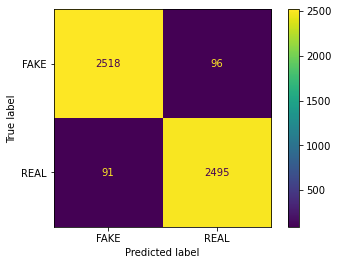

In [34]:
# Visualizamos su respectiva matriz de confusión.
plot_confusion_matrix(entrenamiento, v_test, y_test)
plt.show()

In [35]:
print(classification_report(y_test, prediction_pac))

              precision    recall  f1-score   support

        FAKE       0.97      0.96      0.96      2614
        REAL       0.96      0.96      0.96      2586

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



## Testeo

Ahora veamos cómo funcionan nuestros algoritmos al momento de clasificar.

In [37]:
df_test = pd.read_csv('dataset/test.csv')

# Visualizamos el dataframe con los primeros 10 datos. 
df_test.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [42]:
# Transformamos el conjunto de prueba.
vdf_test = v.transform(X_test.apply(lambda x: np.str_(x)))

### Usamos el MLP

In [43]:
mlpc_test = mlpc.predict(vdf_test) 

In [45]:
nuevo_df = pd.DataFrame({'title': df_test.title, 'label': mlpc_test})

In [52]:
nuevo_df.head(20)

,title,label
0,"Specter of Trump Loosens Tongues, if Not Purse...",FAKE
1,Russian warships ready to strike terrorists ne...,FAKE
2,#NoDAPL: Native American Leaders Vow to Stay A...,REAL
3,"Tim Tebow Will Attempt Another Comeback, This ...",REAL
4,Keiser Report: Meme Wars (E995),REAL
5,Trump is USA's antique hero. Clinton will be n...,REAL
6,Pelosi Calls for FBI Investigation to Find Out...,FAKE
7,Weekly Featured Profile – Randy Shannon,FAKE
8,Urban Population Booms Will Make Climate Chang...,REAL
9,NaN,FAKE


### Usamos el algoritmo Pasivo-Agresivo

In [54]:
pac_test = pac.predict(vdf_test) 

In [55]:
nuevo_df1 = pd.DataFrame({'title': df_test.title, 'label': pac_test})

In [56]:
nuevo_df1.head(20)

,title,label
0,"Specter of Trump Loosens Tongues, if Not Purse...",FAKE
1,Russian warships ready to strike terrorists ne...,FAKE
2,#NoDAPL: Native American Leaders Vow to Stay A...,REAL
3,"Tim Tebow Will Attempt Another Comeback, This ...",REAL
4,Keiser Report: Meme Wars (E995),REAL
5,Trump is USA's antique hero. Clinton will be n...,REAL
6,Pelosi Calls for FBI Investigation to Find Out...,FAKE
7,Weekly Featured Profile – Randy Shannon,FAKE
8,Urban Population Booms Will Make Climate Chang...,REAL
9,NaN,FAKE
